## Elon_Tweet_Sentiment_Analysis

In [214]:
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [215]:
elon_tweets_reply = pd.read_csv(Path("../csvfiles/tweets_and_replies.csv"))
display(elon_tweets_reply.head())
display(elon_tweets_reply.tail())

,Id,Date,Text,ConversationId
0,1575021541103874048,2022-09-28 07:16:12+00:00,https://t.co/mEBAgBCCkj,1575021541103874048
1,1574958348163612672,2022-09-28 03:05:06+00:00,I guess this joke is a slow burn … 🥁,1574895951973449729
2,1574957722415398912,2022-09-28 03:02:36+00:00,@WholeMarsBlog Big improvement in high speed c...,1574940528520536064
3,1574956999938256896,2022-09-28 02:59:44+00:00,@chrispavlovski @dbongino @rustyrockets Maybe ...,1574861160502927385
4,1574901832622612480,2022-09-27 23:20:31+00:00,Make “hair on fire” not just a metaphor,1574901832622612480


,Id,Date,Text,ConversationId
7248,1433137351203561474,2021-09-01 18:39:05+00:00,@Kristennetten @StianWalgermo @Tesla @ARKInves...,1433080556376530952
7249,1433123220643717120,2021-09-01 17:42:56+00:00,@thesheetztweetz They can shake their fist at ...,1433081862918975496
7250,1433122554156257280,2021-09-01 17:40:17+00:00,@StianWalgermo @Tesla @ARKInvest @WholeMarsBlo...,1433080556376530952
7251,1433121450446127106,2021-09-01 17:35:54+00:00,@Max9907826460 @TeslaratiTeam Our new crane!,1433001281753337856
7252,1433115031940440065,2021-09-01 17:10:24+00:00,@AaronS5_ @ashleevance 2021 has been the year ...,1433110569100333061


In [216]:
elon_tweets_reply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              7253 non-null   int64 
 1   Date            7253 non-null   object
 2   Text            7253 non-null   object
 3   ConversationId  7253 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 226.8+ KB


In [217]:
elon_tweets_reply.shape

(7253, 4)

In [218]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np

import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manisha_lal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [219]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [220]:
cleaned_tweets = []

for tweet in elon_tweets_reply['Text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [221]:
elon_tweets_reply['cleaned'] = pd.DataFrame(cleaned_tweets)
elon_tweets_reply.head(5)

,Id,Date,Text,ConversationId,cleaned
0,1575021541103874048,2022-09-28 07:16:12+00:00,https://t.co/mEBAgBCCkj,1575021541103874048,
1,1574958348163612672,2022-09-28 03:05:06+00:00,I guess this joke is a slow burn … 🥁,1574895951973449729,i guess this joke is slow burn
2,1574957722415398912,2022-09-28 03:02:36+00:00,@WholeMarsBlog Big improvement in high speed c...,1574940528520536064,big improvement in high speed cross traffic v...
3,1574956999938256896,2022-09-28 02:59:44+00:00,@chrispavlovski @dbongino @rustyrockets Maybe ...,1574861160502927385,maybe worth talking at some point
4,1574901832622612480,2022-09-27 23:20:31+00:00,Make “hair on fire” not just a metaphor,1574901832622612480,make hair on fire not just metaphor


In [222]:
#Calculating Negative, Positive, Neutral and Compound values

elon_tweets_reply[['polarity', 'subjectivity']] = elon_tweets_reply['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in elon_tweets_reply['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        elon_tweets_reply.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        elon_tweets_reply.loc[index, 'sentiment'] = "positive"
    else:
        elon_tweets_reply.loc[index, 'sentiment'] = "neutral"
    elon_tweets_reply.loc[index, 'neg'] = neg
    elon_tweets_reply.loc[index, 'neu'] = neu
    elon_tweets_reply.loc[index, 'pos'] = pos
    elon_tweets_reply.loc[index, 'compound'] = comp

elon_tweets_reply.head(5)[['polarity', 'subjectivity']] = elon_tweets_reply['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in elon_tweets_reply['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        elon_tweets_reply.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        elon_tweets_reply.loc[index, 'sentiment'] = "positive"
    else:
        elon_tweets_reply.loc[index, 'sentiment'] = "neutral"
    elon_tweets_reply.loc[index, 'neg'] = neg
    elon_tweets_reply.loc[index, 'neu'] = neu
    elon_tweets_reply.loc[index, 'pos'] = pos
    elon_tweets_reply.loc[index, 'compound'] = comp

elon_tweets_reply.head(5)

,Id,Date,Text,ConversationId,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1575021541103874048,2022-09-28 07:16:12+00:00,https://t.co/mEBAgBCCkj,1575021541103874048,,0.00,0.00,neutral,0.000,0.000,0.000,0.0000
1,1574958348163612672,2022-09-28 03:05:06+00:00,I guess this joke is a slow burn … 🥁,1574895951973449729,i guess this joke is slow burn,-0.30,0.40,positive,0.000,0.694,0.306,0.2960
2,1574957722415398912,2022-09-28 03:02:36+00:00,@WholeMarsBlog Big improvement in high speed c...,1574940528520536064,big improvement in high speed cross traffic v...,0.04,0.16,positive,0.000,0.786,0.214,0.4588
3,1574956999938256896,2022-09-28 02:59:44+00:00,@chrispavlovski @dbongino @rustyrockets Maybe ...,1574861160502927385,maybe worth talking at some point,0.30,0.10,positive,0.000,0.725,0.275,0.2263
4,1574901832622612480,2022-09-27 23:20:31+00:00,Make “hair on fire” not just a metaphor,1574901832622612480,make hair on fire not just metaphor,0.00,0.00,negative,0.286,0.714,0.000,-0.3400


In [223]:
#Creating new data frames for all sentiments (positive, negative and neutral)

elon_tweets_negative = elon_tweets_reply[elon_tweets_reply["sentiment"]=="negative"]
elon_tweets_positive = elon_tweets_reply[elon_tweets_reply["sentiment"]=="positive"]
elon_tweets_neutral = elon_tweets_reply[elon_tweets_reply["sentiment"]=="neutral"]

In [224]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [225]:
#Count_values for sentiment
count_values_in_column(elon_tweets_reply,"sentiment")

,Total,Percentage
neutral,3430,47.29
positive,2807,38.70
negative,1016,14.01


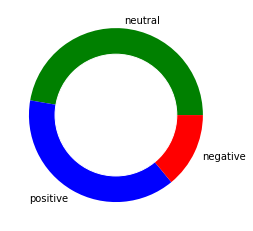

In [226]:
# create data for Pie Chart
pichart = count_values_in_column(elon_tweets_reply,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [227]:
#Calculating tweet's lenght and word count
elon_tweets_reply['text_len'] = elon_tweets_reply['cleaned'].astype(str).apply(len)
elon_tweets_reply['text_word_count'] = elon_tweets_reply['cleaned'].apply(lambda x: len(str(x).split()))

In [228]:
round(pd.DataFrame(elon_tweets_reply.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,93.00
neutral,30.66
positive,73.40


In [289]:
elon_tweets_reply.to_csv("../csvfiles/elon_tweets_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
elon_tweets_reply.head()

,Id,Date,Text,ConversationId,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,1575021541103874048,2022-09-28 00:00:00+00:00,https://t.co/mEBAgBCCkj,1575021541103874048,,0.00,0.00,neutral,0.000,0.000,0.000,0.0000,1,0
1,1574958348163612672,2022-09-28 00:00:00+00:00,I guess this joke is a slow burn … 🥁,1574895951973449729,i guess this joke is slow burn,-0.30,0.40,positive,0.000,0.694,0.306,0.2960,31,7
2,1574957722415398912,2022-09-28 00:00:00+00:00,@WholeMarsBlog Big improvement in high speed c...,1574940528520536064,big improvement in high speed cross traffic v...,0.04,0.16,positive,0.000,0.786,0.214,0.4588,74,12
3,1574956999938256896,2022-09-28 00:00:00+00:00,@chrispavlovski @dbongino @rustyrockets Maybe ...,1574861160502927385,maybe worth talking at some point,0.30,0.10,positive,0.000,0.725,0.275,0.2263,34,6
4,1574901832622612480,2022-09-27 00:00:00+00:00,Make “hair on fire” not just a metaphor,1574901832622612480,make hair on fire not just metaphor,0.00,0.00,negative,0.286,0.714,0.000,-0.3400,35,7


In [230]:
elon_tweets_reply.shape

(7253, 14)

In [251]:
elon_tweets_reply['Date'] = pd.to_datetime(elon_tweets_reply["Date"]).dt.normalize()
elon_tweets_reply.set_index('Date')

,Id,Text,ConversationId,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
Date,,,,,,,,,,,,,
2022-09-28 00:00:00+00:00,1575021541103874048,https://t.co/mEBAgBCCkj,1575021541103874048,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000,1,0
2022-09-28 00:00:00+00:00,1574958348163612672,I guess this joke is a slow burn … 🥁,1574895951973449729,i guess this joke is slow burn,-0.300000,0.400000,positive,0.000,0.694,0.306,0.2960,31,7
2022-09-28 00:00:00+00:00,1574957722415398912,@WholeMarsBlog Big improvement in high speed c...,1574940528520536064,big improvement in high speed cross traffic v...,0.040000,0.160000,positive,0.000,0.786,0.214,0.4588,74,12
2022-09-28 00:00:00+00:00,1574956999938256896,@chrispavlovski @dbongino @rustyrockets Maybe ...,1574861160502927385,maybe worth talking at some point,0.300000,0.100000,positive,0.000,0.725,0.275,0.2263,34,6
2022-09-27 00:00:00+00:00,1574901832622612480,Make “hair on fire” not just a metaphor,1574901832622612480,make hair on fire not just metaphor,0.000000,0.000000,negative,0.286,0.714,0.000,-0.3400,35,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01 00:00:00+00:00,1433137351203561474,@Kristennetten @StianWalgermo @Tesla @ARKInves...,1433080556376530952,avoigt was in the berlin paint shop talking t...,0.296338,0.538258,positive,0.024,0.688,0.288,0.9598,259,51
2021-09-01 00:00:00+00:00,1433123220643717120,@thesheetztweetz They can shake their fist at ...,1433081862918975496,they can shake their fist at the sky,0.000000,0.000000,negative,0.195,0.805,0.000,-0.1779,37,8
2021-09-01 00:00:00+00:00,1433122554156257280,@StianWalgermo @Tesla @ARKInvest @WholeMarsBlo...,1433080556376530952,avoigt norway ftw,0.000000,0.000000,positive,0.000,0.400,0.600,0.4588,19,3


In [290]:
sentiment_cats = ["sentiment"]

In [292]:
enc = OneHotEncoder(sparse=False)
encoded_data = enc.fit_transform(elon_tweets_reply[sentiment_cats])
encoded_df = pd.DataFrame(
    encoded_data,
    columns=enc.get_feature_names(sentiment_cats)
)
encoded_df

,sentiment_negative,sentiment_neutral,sentiment_positive
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
7248,0.0,0.0,1.0
7249,1.0,0.0,0.0
7250,0.0,0.0,1.0
7251,0.0,1.0,0.0


In [293]:
merged_df = pd.concat([encoded_df, elon_tweets_reply],axis=1)
merged_df.head()

,sentiment_negative,sentiment_neutral,sentiment_positive,Id,Date,Text,ConversationId,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,0.0,1.0,0.0,1575021541103874048,2022-09-28 00:00:00+00:00,https://t.co/mEBAgBCCkj,1575021541103874048,,0.00,0.00,neutral,0.000,0.000,0.000,0.0000,1,0
1,0.0,0.0,1.0,1574958348163612672,2022-09-28 00:00:00+00:00,I guess this joke is a slow burn … 🥁,1574895951973449729,i guess this joke is slow burn,-0.30,0.40,positive,0.000,0.694,0.306,0.2960,31,7
2,0.0,0.0,1.0,1574957722415398912,2022-09-28 00:00:00+00:00,@WholeMarsBlog Big improvement in high speed c...,1574940528520536064,big improvement in high speed cross traffic v...,0.04,0.16,positive,0.000,0.786,0.214,0.4588,74,12
3,0.0,0.0,1.0,1574956999938256896,2022-09-28 00:00:00+00:00,@chrispavlovski @dbongino @rustyrockets Maybe ...,1574861160502927385,maybe worth talking at some point,0.30,0.10,positive,0.000,0.725,0.275,0.2263,34,6
4,1.0,0.0,0.0,1574901832622612480,2022-09-27 00:00:00+00:00,Make “hair on fire” not just a metaphor,1574901832622612480,make hair on fire not just metaphor,0.00,0.00,negative,0.286,0.714,0.000,-0.3400,35,7


In [294]:
merged_df.columns

Index(['sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'Id',
       'Date', 'Text', 'ConversationId', 'cleaned', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'neu', 'pos', 'compound', 'text_len',
       'text_word_count'],
      dtype='object')

In [298]:
merged_df = merged_df[["Date", 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive','polarity', 'subjectivity']]
merged_df.set_index('Date')                      

,sentiment_negative,sentiment_neutral,sentiment_positive,polarity,subjectivity
Date,,,,,
2022-09-28 00:00:00+00:00,0.0,1.0,0.0,0.000000,0.000000
2022-09-28 00:00:00+00:00,0.0,0.0,1.0,-0.300000,0.400000
2022-09-28 00:00:00+00:00,0.0,0.0,1.0,0.040000,0.160000
2022-09-28 00:00:00+00:00,0.0,0.0,1.0,0.300000,0.100000
2022-09-27 00:00:00+00:00,1.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...
2021-09-01 00:00:00+00:00,0.0,0.0,1.0,0.296338,0.538258
2021-09-01 00:00:00+00:00,1.0,0.0,0.0,0.000000,0.000000
2021-09-01 00:00:00+00:00,0.0,0.0,1.0,0.000000,0.000000
